In [30]:
# 모듈 및 데이터 로드 
from sklearn.datasets import load_breast_cancer 
from sklearn.linear_model import LogisticRegression 

data = load_breast_cancer() 

# x, y 데이터 생성 
X = data.data 

# 악성을 1, 양성을 0으로 
y = 1 - data.target 

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10] 

# 로지스틱 회귀 모델 생성 
model_lor = LogisticRegression(solver = 'lbfgs') 
model_lor.fit(X,y) 
y_pred = model_lor.predict(X)

* 오차 행렬(혼동 행렬) 생성

In [53]:
# 종속 변수와 예측 결과로 혼동 행렬 생성
from sklearn.metrics import confusion_matrix
confusion_matrix(y,y_pred)

array([[337,  20],
       [ 30, 182]], dtype=int64)

* 정확도

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

0.9121265377855887

* 정밀도

In [55]:
from sklearn.metrics import precision_score
precision_score(y,y_pred)

0.900990099009901

* 재현율

In [56]:
from sklearn.metrics import recall_score
recall_score(y,y_pred)

0.8584905660377359

* F1 score

In [57]:
from sklearn.metrics import f1_score
f1_score(y,y_pred)

0.8792270531400966

* 예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.

In [64]:
from sklearn.preprocessing import Binarizer

pred_proba = model_lor.predict_proba(X)
pred = model_lor.predict(X)

pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=0.1).fit(pred_proba_1)
y_pred2 = binarizer.transform(pred_proba_1)

In [65]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy,precision,recall,f1))
    
get_clf_eval(y,y_pred2,None)

오차 행렬
[[267  90]
 [  6 206]]
정확도: 0.8313, 정밀도: 0.6959, 재현율: 0.9717, F1: 0.8110


* ROC 곡선 시각화

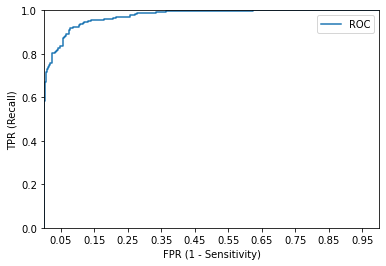

In [68]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
import numpy as np 

fprs, tprs, thresholds = roc_curve(y,pred_proba_1)

def roc_curve_plot(Y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y, pred_proba_1) # 임계값에 따른 FPR, TPR 값을 반환받음
    plt.plot(fprs, tprs, label="ROC") # ROC 곡선

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel("FPR (1 - Sensitivity)")
    plt.ylabel("TPR (Recall)")
    plt.legend()

roc_curve_plot(y, pred_proba_1)

* ROC AUC 값

In [ ]:
roc_auc_score(y_test, pred_proba_1)